Step 1: Data Cleaning and Processing

In [1]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.impute import SimpleImputer


In [2]:
#Data Dictionary

weather_data = {
    "Element": [
        "tempmax", "tempmin", "temp", "dew", "feelslike", "precip", "precipprob",
        "precipcover", "preciptype", "snow", "snowdepth", "windspeed", "windgust",
        "winddir", "visibility", "cloudcover", "humidity", "pressure",
        "solarradiation", "solarenergy", "uvindex", "severerisk", "sunrise",
        "sunset", "moonphase", "icon", "conditions", "description", "stations"
    ],
    "Description": [
        "Maximum Temperature", "Minimum Temperature", "Temperature (or mean temperature)",
        "Dew Point", "Feels like", "Precipitation", "Precipitation chance",
        "Precipitation cover", "Precipitation type", "Snow", "Snow depth",
        "Wind speed", "Wind gust", "Wind direction", "Visibility", "Cloud cover",
        "Relative humidity", "Sea level pressure", "Solar radiation",
        "Solar energy", "UV index", "Severe Risk", "Sunrise time", "Sunset time",
        "Moonphase", "A weather icon", "Short text about the weather",
        "Description of the weather for the day", "List of weather stations sources"
    ]
}

df = pd.DataFrame(weather_data)
print(df)

           Element                             Description
0          tempmax                     Maximum Temperature
1          tempmin                     Minimum Temperature
2             temp       Temperature (or mean temperature)
3              dew                               Dew Point
4        feelslike                              Feels like
5           precip                           Precipitation
6       precipprob                    Precipitation chance
7      precipcover                     Precipitation cover
8       preciptype                      Precipitation type
9             snow                                    Snow
10       snowdepth                              Snow depth
11       windspeed                              Wind speed
12        windgust                               Wind gust
13         winddir                          Wind direction
14      visibility                              Visibility
15      cloudcover                             Cloud cov

In [4]:

# Load dataset
lagos_weather_data = pd.read_csv('/content/sample_data/merged_data.csv')

# Display the first few rows of the dataset
lagos_weather_data.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,sunrise,sunset,moonphase,conditions,description,icon,stations,windspeedmax,windspeedmin,flood
0,Lagos,2017-01-01,34.0,22.0,27.6,37.3,22.0,29.4,22.0,74.3,...,2017-01-01T06:57:27,2017-01-01T18:42:46,0.11,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"65210099999,DNMM,remote,65201099999",NaN,NaN,0.0
1,Lagos,2017-01-02,35.0,23.9,28.3,40.0,23.9,30.9,23.7,78.2,...,2017-01-02T06:57:52,2017-01-02T18:43:17,0.15,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"DNMM,65201099999",NaN,NaN,0.0
2,Lagos,2017-01-03,34.2,24.0,28.4,37.3,24.0,30.3,22.6,73.5,...,2017-01-03T06:58:17,2017-01-03T18:43:47,0.18,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"DNMM,65201099999",NaN,NaN,0.0
3,Lagos,2017-01-04,35.0,23.9,28.4,36.3,23.9,28.7,20.3,66.4,...,2017-01-04T06:58:41,2017-01-04T18:44:18,0.22,Clear,Clear conditions throughout the day.,clear-day,"65210099999,DNMM,remote,65201099999",NaN,NaN,0.0
4,Lagos,2017-01-05,34.0,22.4,27.9,38.5,22.4,30.4,22.9,76.2,...,2017-01-05T06:59:04,2017-01-05T18:44:48,0.25,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"DNMM,remote,65201099999",NaN,NaN,0.0


<ipython-input-5-98b6ea2fe256>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lagos_weather_data['precip'], kde=True, bins=10, color='blue')


<Axes: xlabel='precip', ylabel='Density'>

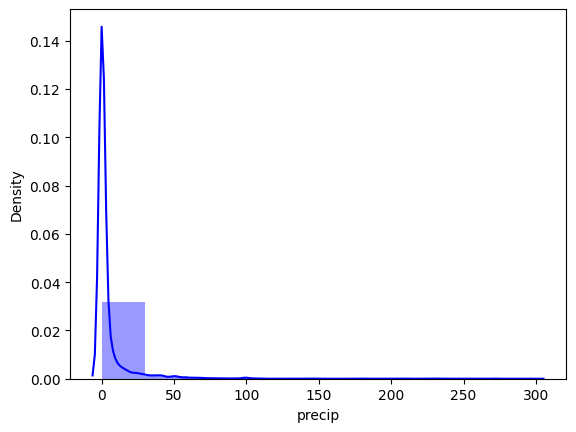

In [5]:
sns.distplot(lagos_weather_data['precip'], kde=True, bins=10, color='blue')

In [6]:

#check the shape of the data
lagos_weather_data.shape

(44498, 36)

In [11]:

# Check for missing values
missing_values = lagos_weather_data.isnull().sum()
#print(missing_values)

print(missing_values[missing_values > 0])

tempmax              2364
tempmin              2364
temp                 3292
feelslikemax         2364
feelslikemin         2364
feelslike            3292
dew                  3292
humidity             3292
precip               3292
precipprob           3292
preciptype          23794
snow                20900
snowdepth           20960
windgust            11470
windspeed            2392
winddir              4824
sealevelpressure     4198
cloudcover           3292
visibility           4496
solarradiation      13600
solarenergy         13600
uvindex             13600
severerisk          36296
sunrise              1464
sunset               1464
moonphase            1464
conditions           4716
description          5164
icon                 4716
stations             5192
windspeedmax        43034
windspeedmin        43034
dtype: int64


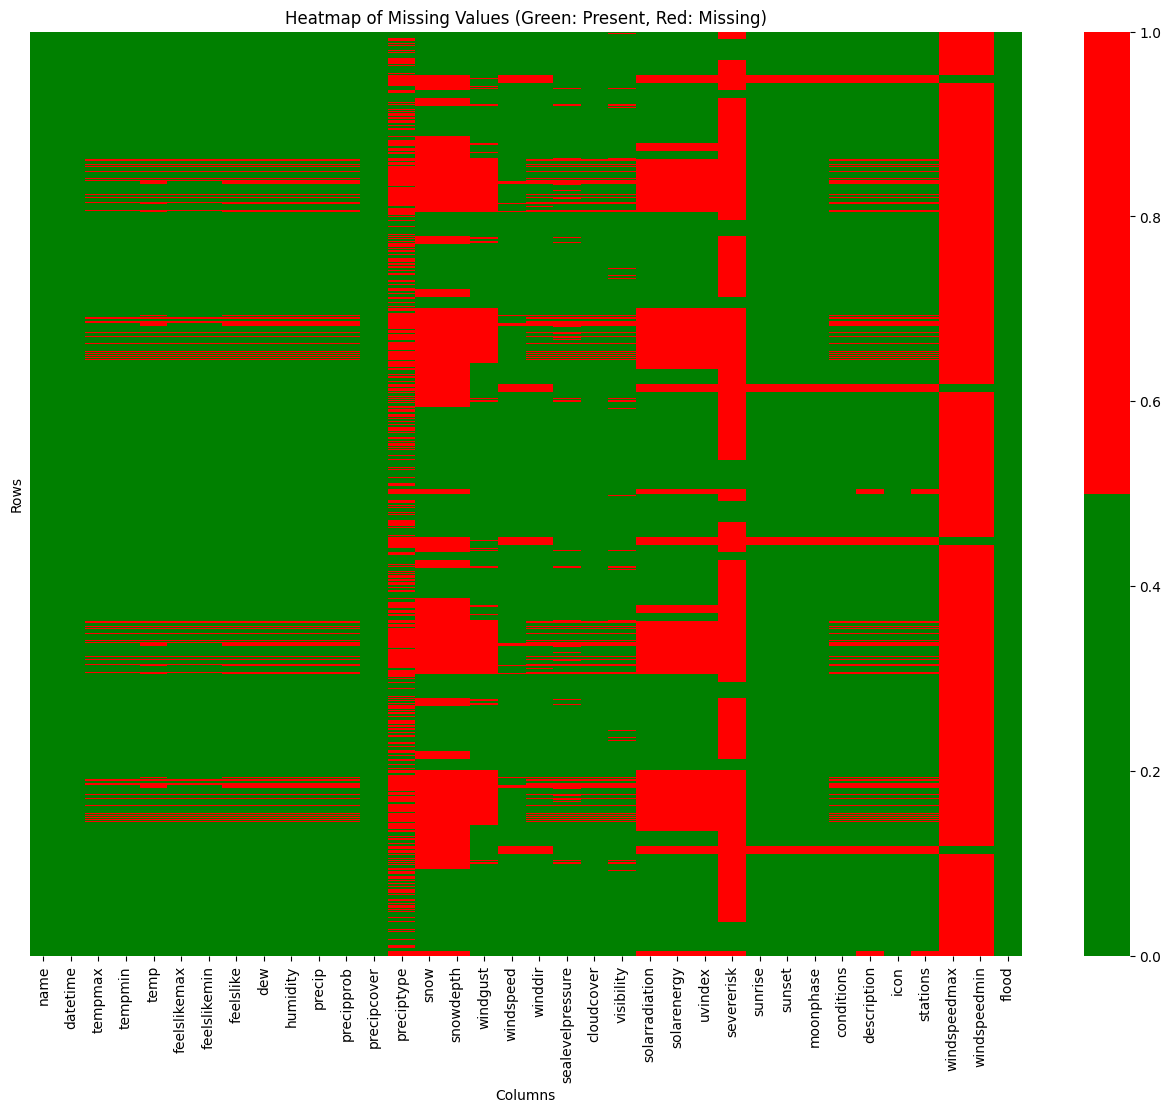

In [12]:
#Visualize missing values using heatmap
# Convert datetime column to datetime format
# Define a custom color map: green for present values, red for missing values
colors = ['green', 'red']
cmap = sns.color_palette(colors)

# Plot the missing values heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(lagos_weather_data.isnull(), cbar=True, cmap=cmap, yticklabels=False)
plt.title('Heatmap of Missing Values (Green: Present, Red: Missing)')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [14]:
# Calculate the threshold for dropping columns (70% missing data)
threshold = 0.7 * len(lagos_weather_data)

# Drop columns where the number of missing values is greater than the threshold
lagos_weather_data_dropped = lagos_weather_data.loc[:, lagos_weather_data.isnull().sum() <= threshold]

# Output the remaining columns after dropping
remaining_columns = lagos_weather_data_dropped.columns
print(f"Remaining columns after dropping columns with more than 70% missing data:\n{remaining_columns}")


Remaining columns after dropping columns with more than 70% missing data:
Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'sunrise', 'sunset',
       'moonphase', 'conditions', 'description', 'icon', 'stations', 'flood'],
      dtype='object')


In [15]:

#print the remaining data
lagos_weather_data_dropped.head()


,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,sunrise,sunset,moonphase,conditions,description,icon,stations,flood
0,Lagos,2017-01-01,34.0,22.0,27.6,37.3,22.0,29.4,22.0,74.3,...,21.0,9.0,2017-01-01T06:57:27,2017-01-01T18:42:46,0.11,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"65210099999,DNMM,remote,65201099999",0.0
1,Lagos,2017-01-02,35.0,23.9,28.3,40.0,23.9,30.9,23.7,78.2,...,20.9,9.0,2017-01-02T06:57:52,2017-01-02T18:43:17,0.15,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"DNMM,65201099999",0.0
2,Lagos,2017-01-03,34.2,24.0,28.4,37.3,24.0,30.3,22.6,73.5,...,20.9,9.0,2017-01-03T06:58:17,2017-01-03T18:43:47,0.18,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"DNMM,65201099999",0.0
3,Lagos,2017-01-04,35.0,23.9,28.4,36.3,23.9,28.7,20.3,66.4,...,21.8,9.0,2017-01-04T06:58:41,2017-01-04T18:44:18,0.22,Clear,Clear conditions throughout the day.,clear-day,"65210099999,DNMM,remote,65201099999",0.0
4,Lagos,2017-01-05,34.0,22.4,27.9,38.5,22.4,30.4,22.9,76.2,...,20.9,9.0,2017-01-05T06:59:04,2017-01-05T18:44:48,0.25,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"DNMM,remote,65201099999",0.0


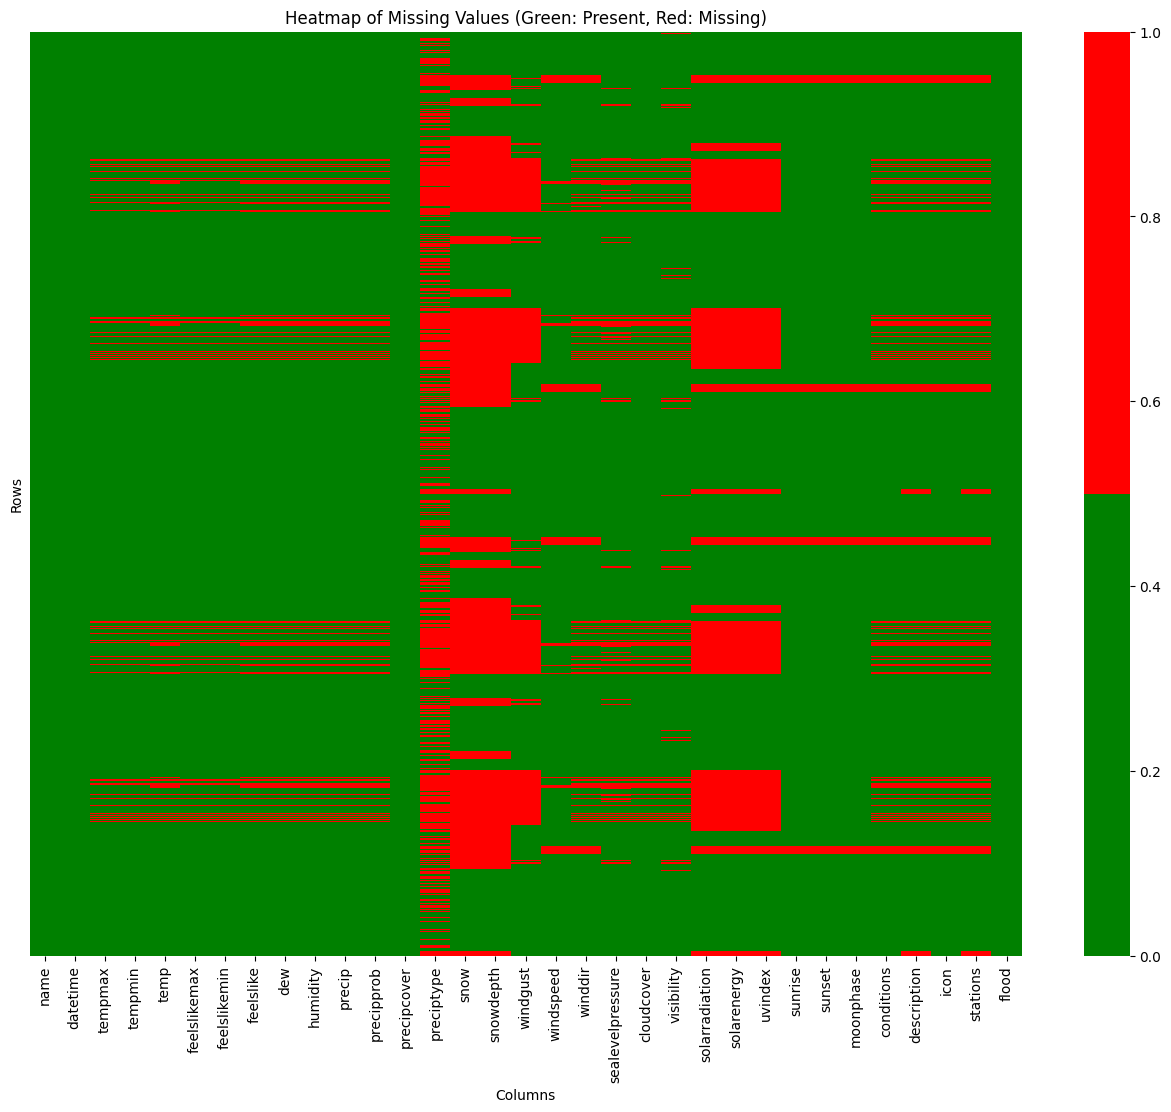

In [16]:

# Plot the missing values heatmap for the remaining columns
plt.figure(figsize=(16, 12))
sns.heatmap(lagos_weather_data_dropped.isnull(), cbar=True, cmap=cmap, yticklabels=False)
plt.title('Heatmap of Missing Values (Green: Present, Red: Missing)')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

<ipython-input-17-187c3cdf0f62>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lagos_weather_data[numerical_columns] = numerical_imputer.fit_transform(lagos_weather_data[numerical_columns])


name                0
datetime            0
tempmax             0
tempmin             0
temp                0
feelslikemax        0
feelslikemin        0
feelslike           0
dew                 0
humidity            0
precip              0
precipprob          0
precipcover         0
preciptype          0
snow                0
snowdepth           0
windgust            0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
solarradiation      0
solarenergy         0
uvindex             0
sunrise             0
sunset              0
moonphase           0
conditions          0
description         0
icon                0
stations            0
flood               0
dtype: int64


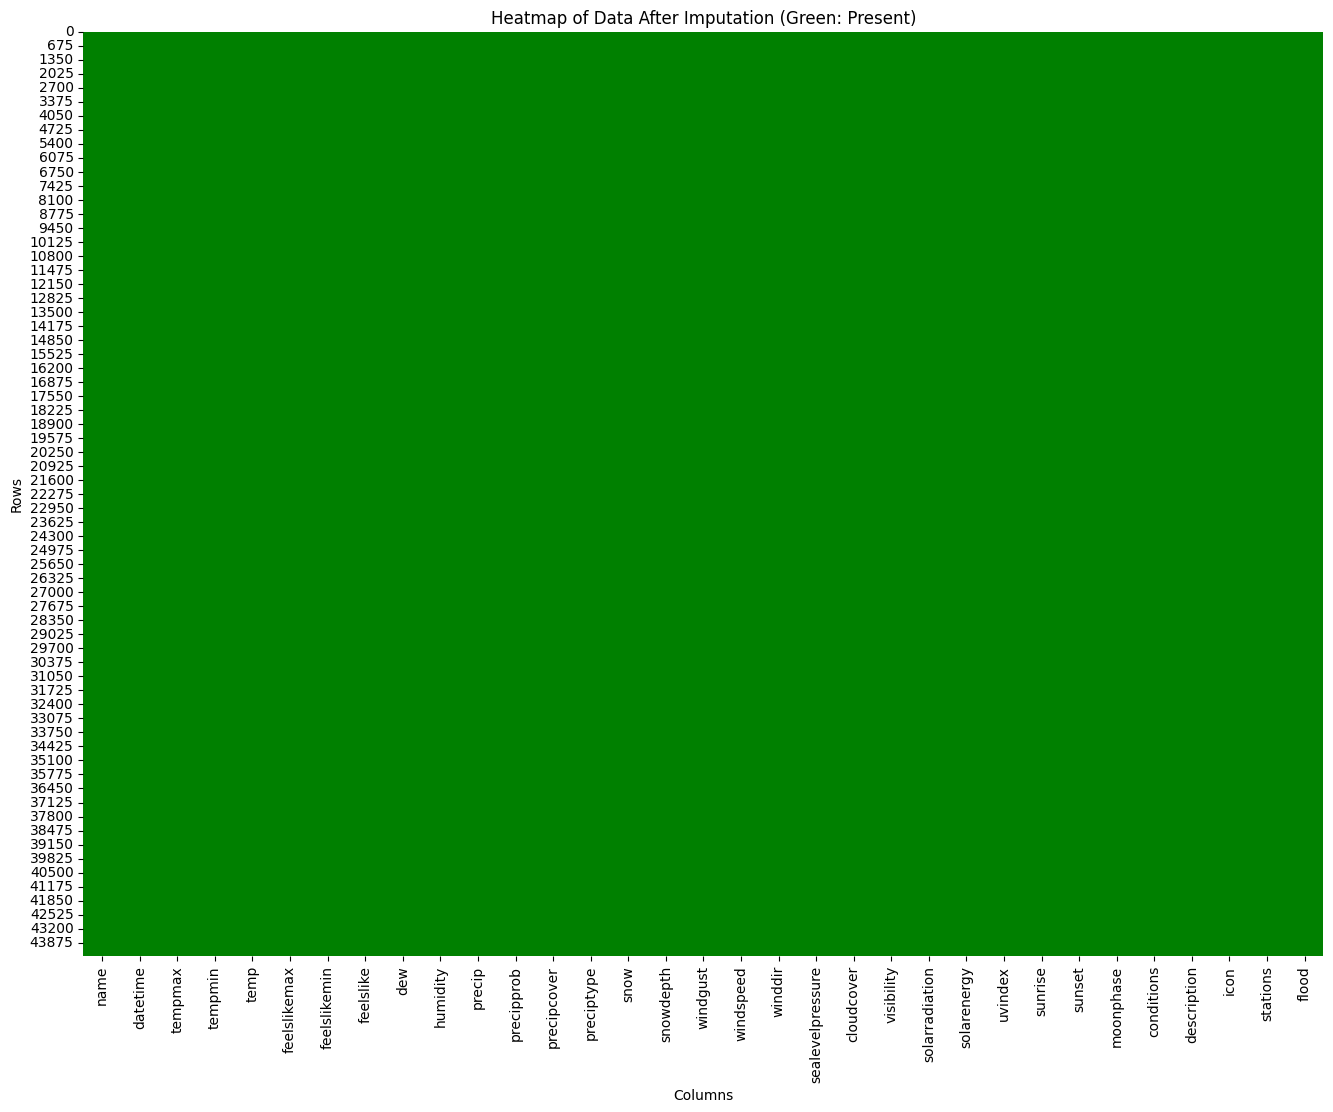

In [17]:

#reset the data variable
lagos_weather_data = lagos_weather_data_dropped

# Define numerical and categorical columns
numerical_columns = lagos_weather_data.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = lagos_weather_data.select_dtypes(exclude=[np.number]).columns.tolist()

# Fill missing values in numerical columns with median
numerical_imputer = SimpleImputer(strategy='median')
lagos_weather_data[numerical_columns] = numerical_imputer.fit_transform(lagos_weather_data[numerical_columns])

# Fill missing values in categorical columns with most frequent value
categorical_imputer = SimpleImputer(strategy='most_frequent')
lagos_weather_data[categorical_columns] = categorical_imputer.fit_transform(lagos_weather_data[categorical_columns])

# Verify no missing values remain
final_missing_values = lagos_weather_data.isnull().sum()
print(final_missing_values)

# Visualize the dataset to confirm no missing values
plt.figure(figsize=(16, 12))
sns.heatmap(lagos_weather_data.isnull(), cbar=False, cmap=['green'])
plt.title('Heatmap of Data After Imputation (Green: Present)')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()


### Exploratory data Analysis

In [18]:

# Exploratory Data Analysis (EDA)
# Statistical Analysis
print(lagos_weather_data.describe())

            tempmax       tempmin          temp  feelslikemax  feelslikemin  \
count  44498.000000  44498.000000  44498.000000  44498.000000  44498.000000   
mean      30.624109     23.945894     27.444060     36.148712     24.146043   
std        5.124282      3.949007      1.505479      7.838885      5.186596   
min        0.000000      0.000000     21.400000      0.000000      0.000000   
25%       29.100000     23.400000     26.300000     33.700000     23.200000   
50%       31.100000     24.200000     27.400000     37.600000     24.100000   
75%       33.100000     25.200000     28.500000     40.600000     25.200000   
max       56.000000     34.600000     34.600000     56.000000     45.100000   

          feelslike           dew      humidity        precip    precipprob  \
count  44498.000000  44498.000000  44498.000000  44498.000000  44498.000000   
mean      30.474902     24.022266     82.788116      4.640105     41.974493   
std        3.398468      1.811232      6.919438    

### Distribution of Key Variables

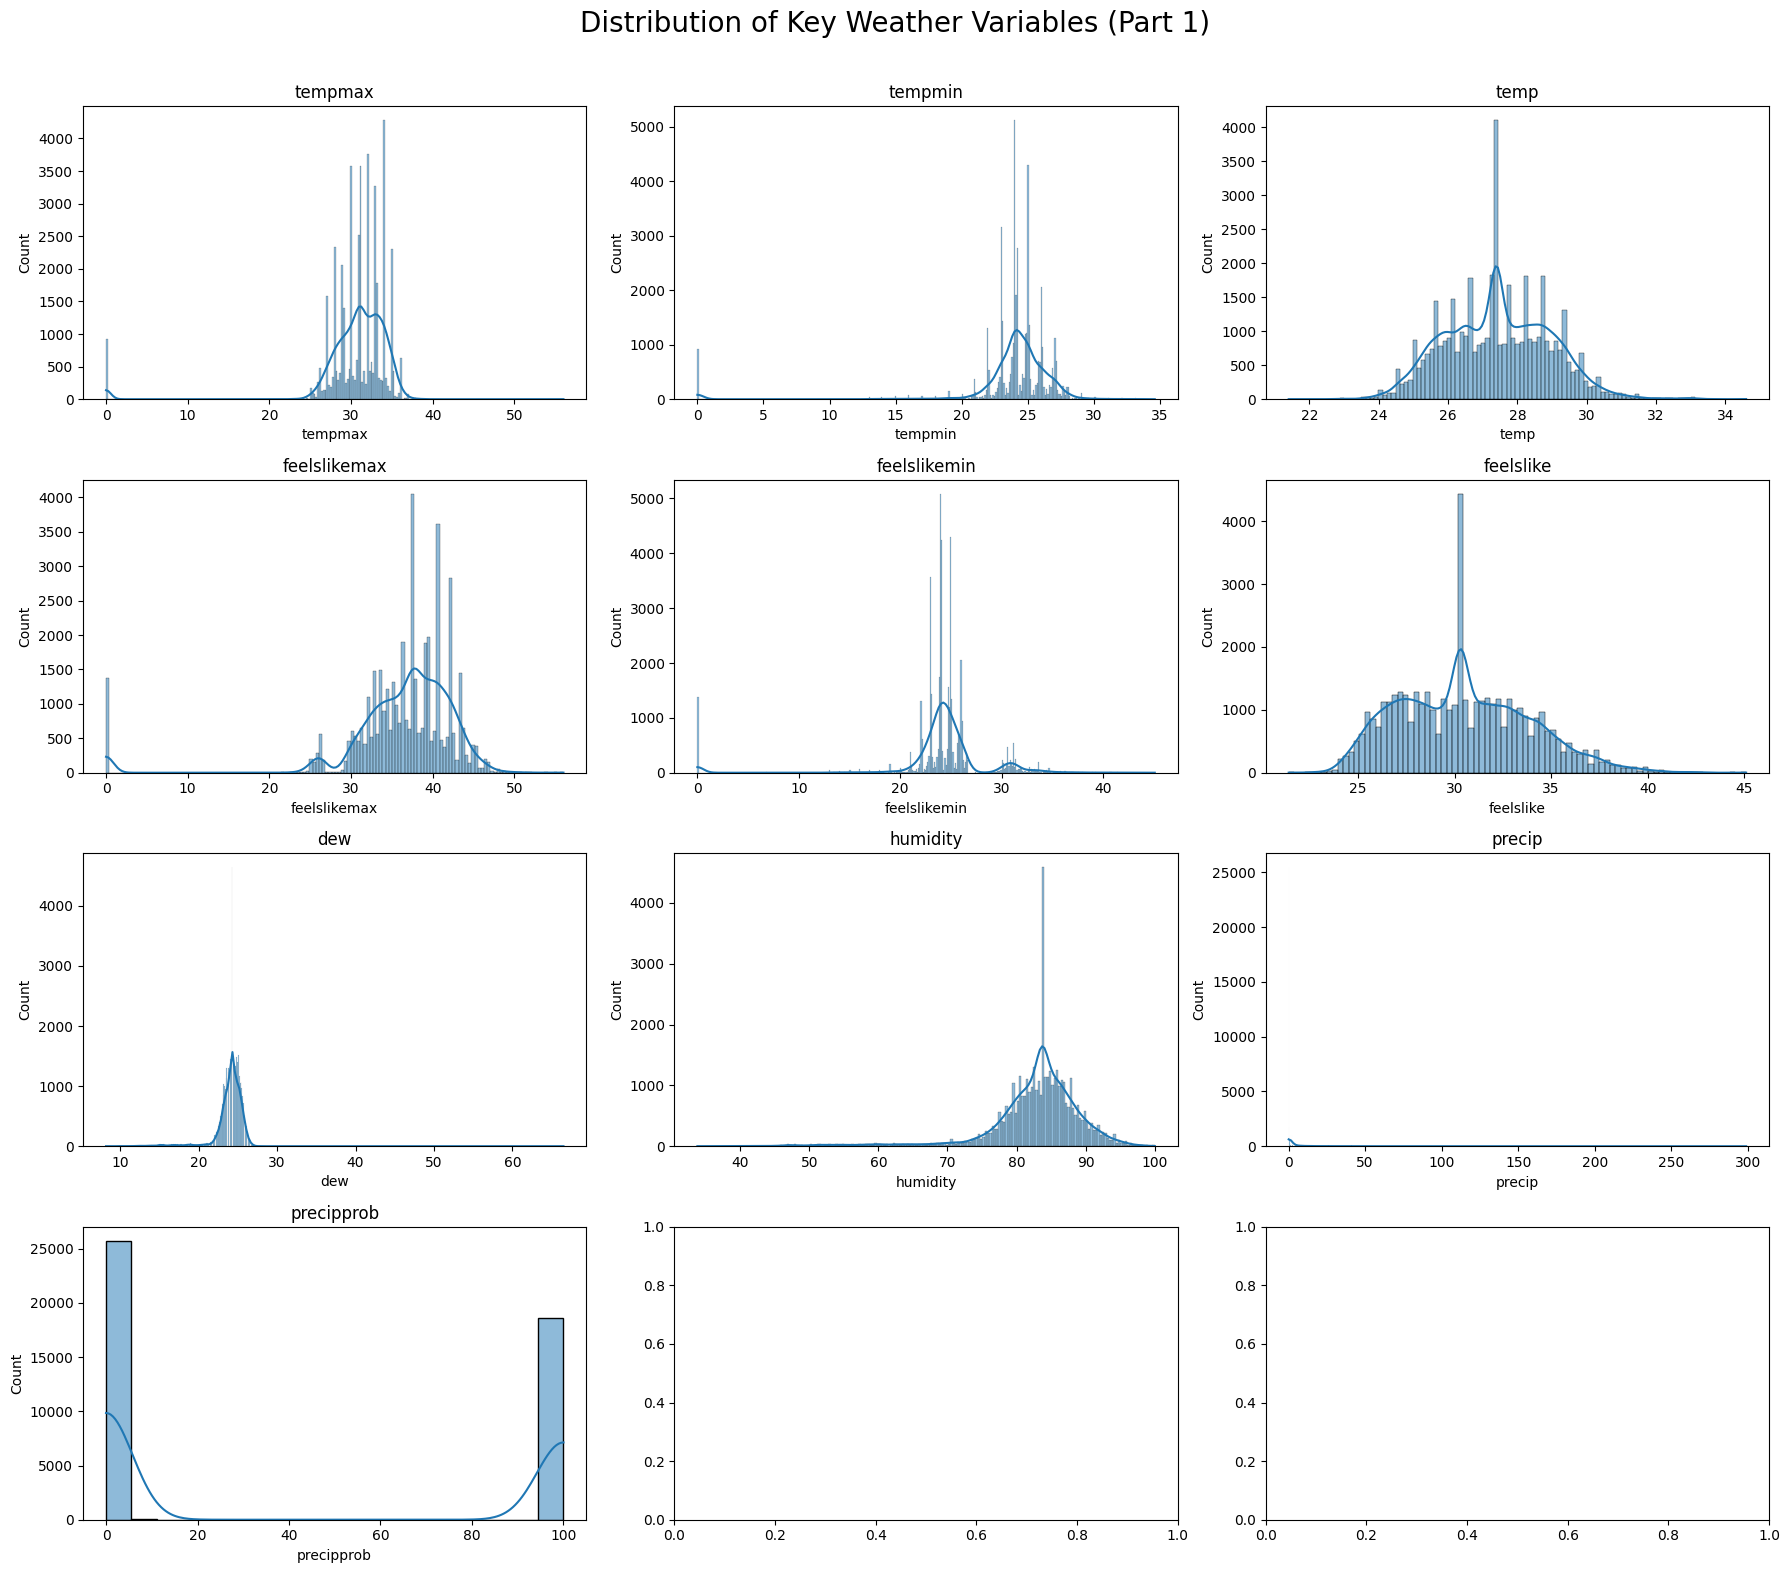

In [19]:
# Plot distributions of the first 12 key variables
fig, axes = plt.subplots(4, 3, figsize=(18, 16))
fig.suptitle('Distribution of Key Weather Variables (Part 1)', fontsize=20)

key_variables_part1 = ['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity',
                       'precip', 'precipprob']

for i, var in enumerate(key_variables_part1):
    ax = axes.flatten()[i]
    sns.histplot(lagos_weather_data[var], kde=True, ax=ax)
    ax.set_title(var)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()



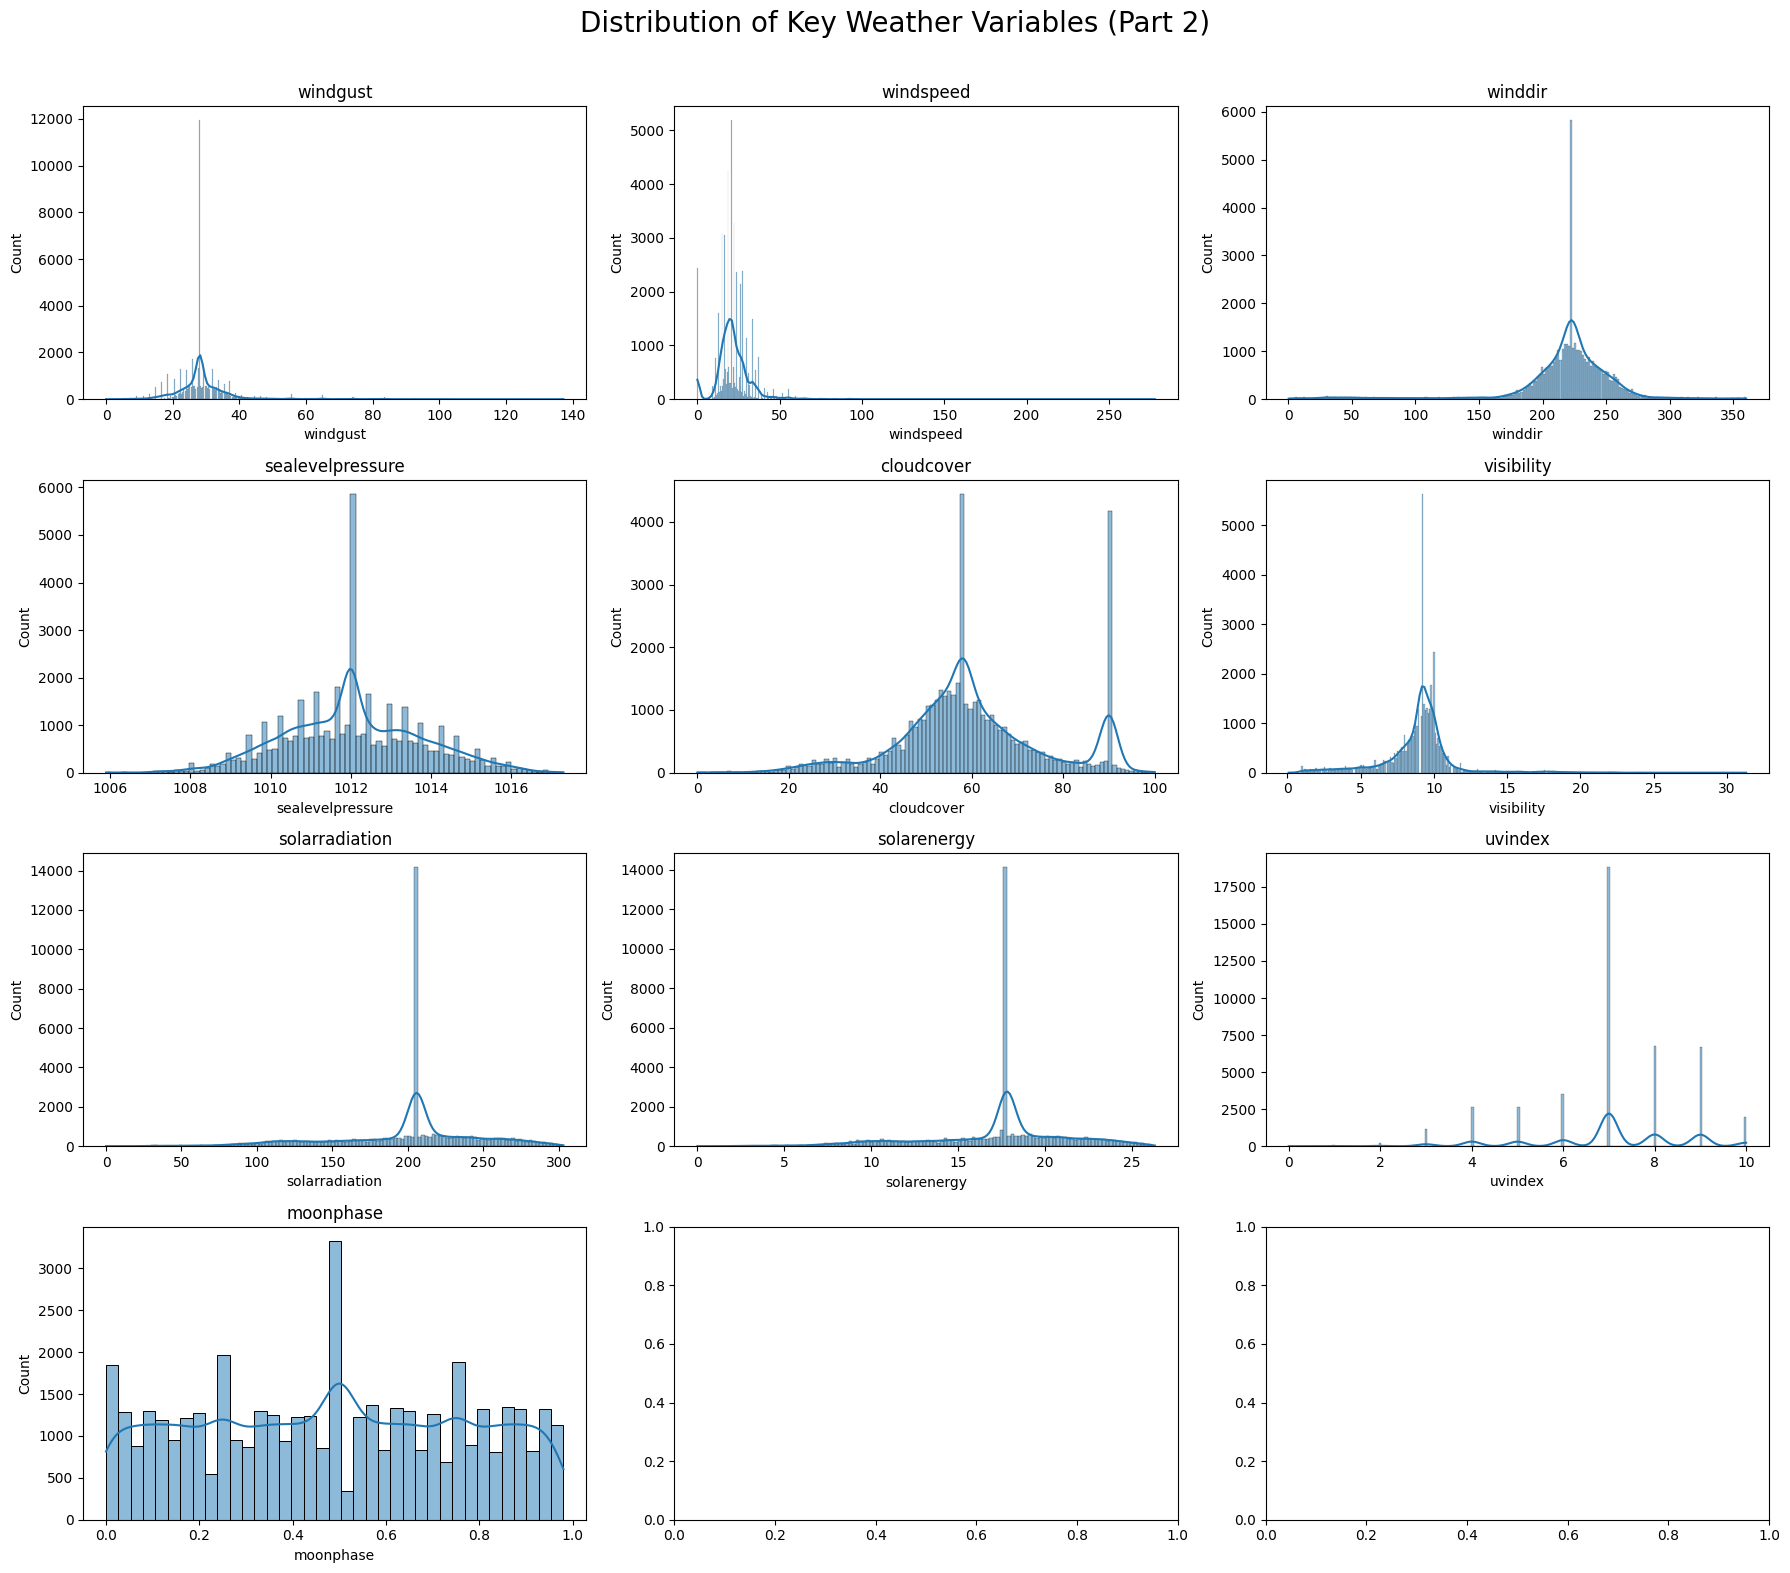

In [20]:

# Plot distributions of the remaining key variables
fig, axes = plt.subplots(4, 3, figsize=(18, 16))
fig.suptitle('Distribution of Key Weather Variables (Part 2)', fontsize=20)

key_variables_part2 = ['windgust', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
                       'solarradiation', 'solarenergy', 'uvindex','moonphase']

for i, var in enumerate(key_variables_part2):
    ax = axes.flatten()[i]
    sns.histplot(lagos_weather_data[var], kde=True, ax=ax)
    ax.set_title(var)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


### Correlation Analysis

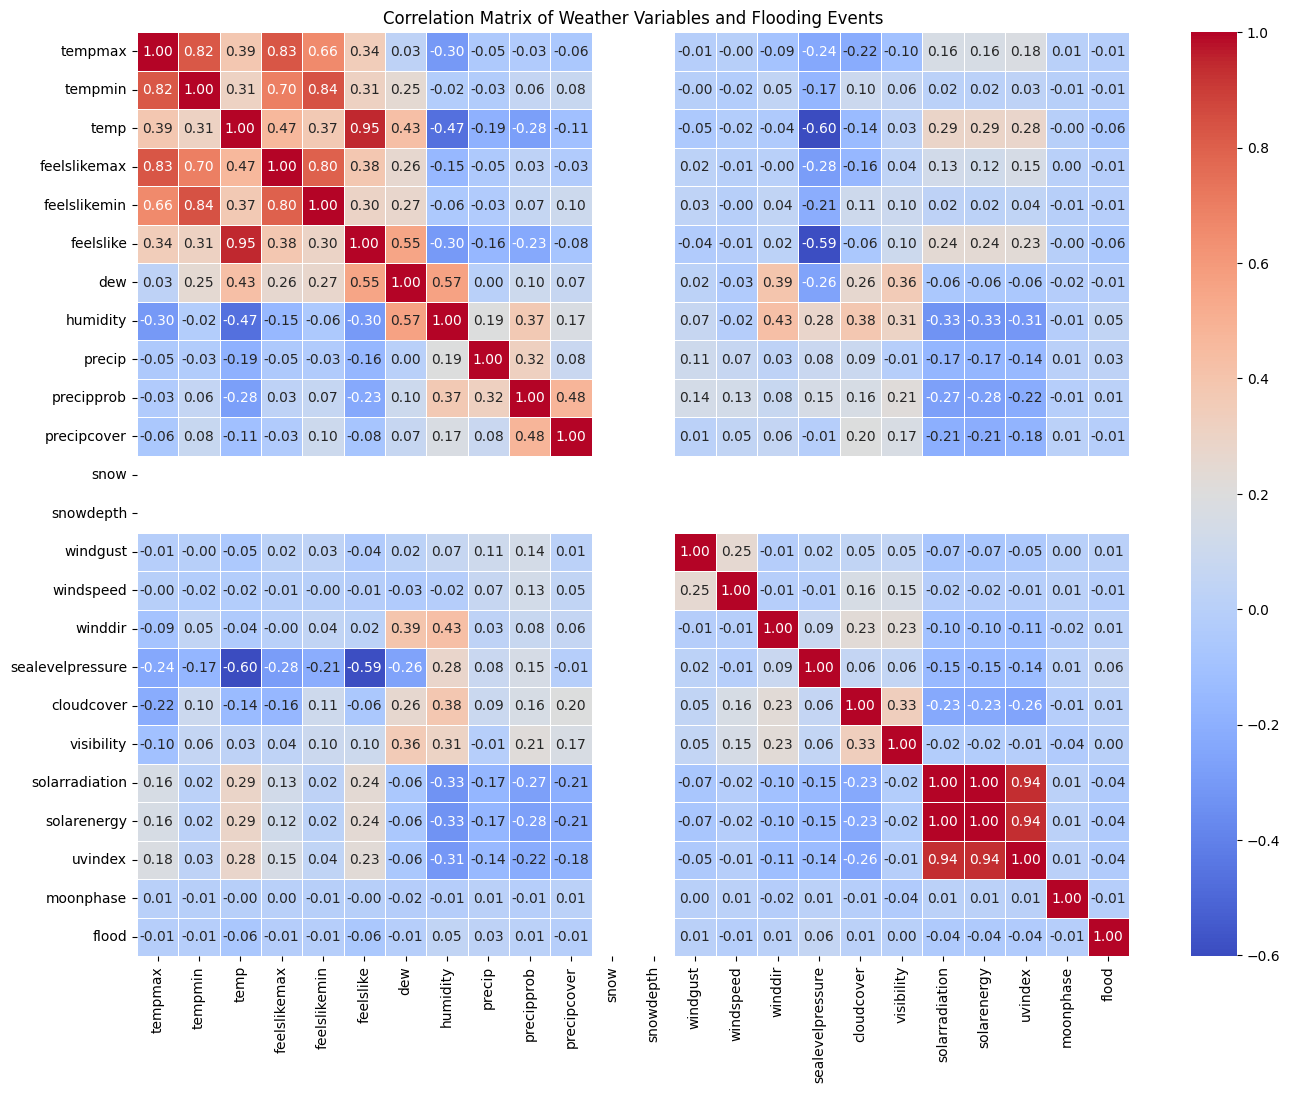

In [21]:

import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for the correlation matrix
numeric_columns = lagos_weather_data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Weather Variables and Flooding Events')
plt.show()


In [22]:

lagos_weather_data=lagos_weather_data.drop(['name','tempmax', 'tempmin', 'feelslikemax', 'feelslikemin', 'feelslike', 'visibility'], axis=1)


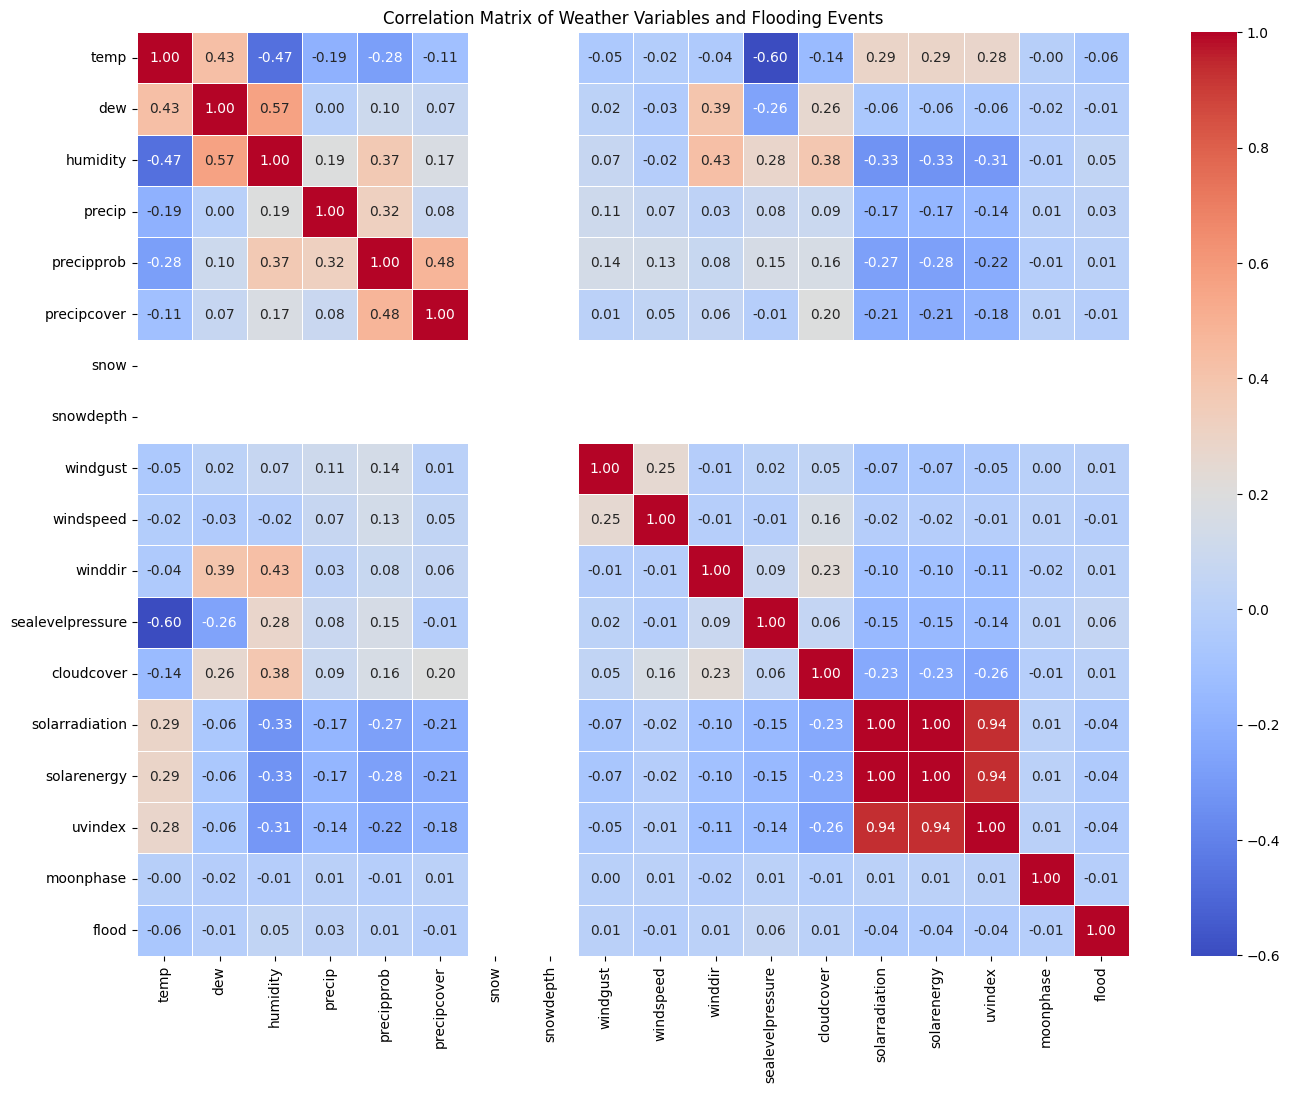

In [23]:
#Rerun the correlation matrix
# Select only numeric columns for the correlation matrix
numeric_columns = lagos_weather_data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Weather Variables and Flooding Events')
plt.show()


In [24]:


lagos_weather_data.columns

Index(['datetime', 'temp', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover',
       'solarradiation', 'solarenergy', 'uvindex', 'sunrise', 'sunset',
       'moonphase', 'conditions', 'description', 'icon', 'stations', 'flood'],
      dtype='object')

### To identify any seasonal patterns or trends, we can visualize the frequency of flooding events over time.

### Time Series Analysis of Flooding Events

### Let's create a time series plot to analyze the frequency of flooding events over the years. ​

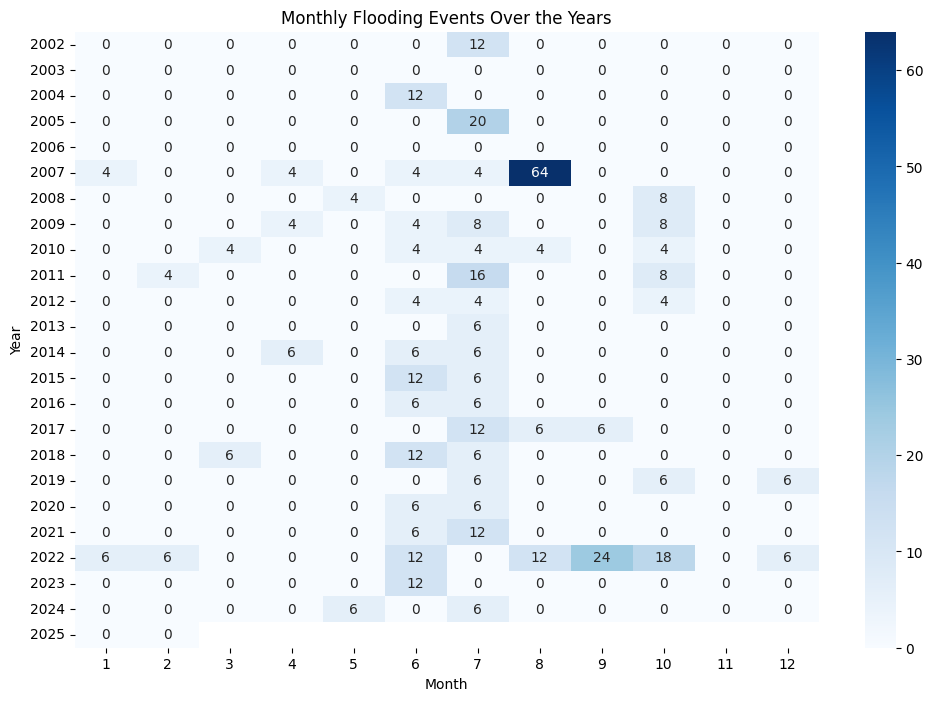

In [31]:

# Create a new column for year and month to analyze trends
# Convert 'datetime' column to datetime object if it's not already
if not pd.api.types.is_datetime64_any_dtype(lagos_weather_data['datetime']):
    lagos_weather_data['datetime'] = pd.to_datetime(lagos_weather_data['datetime'])

# Now you can extract year and month
lagos_weather_data['year'] = lagos_weather_data['datetime'].dt.year
lagos_weather_data['month'] = lagos_weather_data['datetime'].dt.month

# Group by year and month to count flooding events
flooding_trends = lagos_weather_data.groupby(['year', 'month'])['flood'].sum().reset_index()

# Pivot the data for better visualization
flooding_trends_pivot = flooding_trends.pivot(index='year', columns='month', values='flood')

# Plot the heatmap of flooding events over the years
plt.figure(figsize=(12, 8))
sns.heatmap(flooding_trends_pivot, cmap='Blues', annot=True, fmt='g')
plt.title('Monthly Flooding Events Over the Years')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()


### Step3: Model Building

Now that we have a better understanding of the data, we can proceed to build a predictive model. We'll follow these steps:

Prepare the Data:

-Define features and the target variable.

-Split the data into training and testing sets.

Train the Model:

-Select appropriate algorithms (e.g., Random Forest, Gradient Boosting).

-Train the models on the training data.

Evaluate the Model:

-Use appropriate metrics (e.g., accuracy, precision, recall) to evaluate the model on the testing data.

Make Predictions:

-Use the trained model to predict future flooding events.

In [32]:
lagos_weather_data.head()

,datetime,temp,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,...,sunrise,sunset,moonphase,conditions,description,icon,stations,flood,year,month
0,2017-01-01,27.6,22.0,74.3,0.0,0.0,0.0,rain,0.0,0.0,...,2017-01-01T06:57:27,2017-01-01T18:42:46,0.11,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"65210099999,DNMM,remote,65201099999",0.0,2017,1
1,2017-01-02,28.3,23.7,78.2,0.0,0.0,0.0,rain,0.0,0.0,...,2017-01-02T06:57:52,2017-01-02T18:43:17,0.15,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"DNMM,65201099999",0.0,2017,1
2,2017-01-03,28.4,22.6,73.5,0.0,0.0,0.0,rain,0.0,0.0,...,2017-01-03T06:58:17,2017-01-03T18:43:47,0.18,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"DNMM,65201099999",0.0,2017,1
3,2017-01-04,28.4,20.3,66.4,0.0,0.0,0.0,rain,0.0,0.0,...,2017-01-04T06:58:41,2017-01-04T18:44:18,0.22,Clear,Clear conditions throughout the day.,clear-day,"65210099999,DNMM,remote,65201099999",0.0,2017,1
4,2017-01-05,27.9,22.9,76.2,0.0,0.0,0.0,rain,0.0,0.0,...,2017-01-05T06:59:04,2017-01-05T18:44:48,0.25,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"DNMM,remote,65201099999",0.0,2017,1


In [33]:
lagos_weather_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44498 entries, 0 to 44497
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   datetime          44498 non-null  datetime64[ns]
 1   temp              44498 non-null  float64       
 2   dew               44498 non-null  float64       
 3   humidity          44498 non-null  float64       
 4   precip            44498 non-null  float64       
 5   precipprob        44498 non-null  float64       
 6   precipcover       44498 non-null  float64       
 7   preciptype        44498 non-null  object        
 8   snow              44498 non-null  float64       
 9   snowdepth         44498 non-null  float64       
 10  windgust          44498 non-null  float64       
 11  windspeed         44498 non-null  float64       
 12  winddir           44498 non-null  float64       
 13  sealevelpressure  44498 non-null  float64       
 14  cloudcover        4449

In [34]:
lagos_weather_data = lagos_weather_data.drop(['sunrise', 'sunset','stations'],axis=1)

In [35]:
lagos_weather_data.head()

,datetime,temp,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,...,solarradiation,solarenergy,uvindex,moonphase,conditions,description,icon,flood,year,month
0,2017-01-01,27.6,22.0,74.3,0.0,0.0,0.0,rain,0.0,0.0,...,241.7,21.0,9.0,0.11,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,0.0,2017,1
1,2017-01-02,28.3,23.7,78.2,0.0,0.0,0.0,rain,0.0,0.0,...,241.6,20.9,9.0,0.15,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,0.0,2017,1
2,2017-01-03,28.4,22.6,73.5,0.0,0.0,0.0,rain,0.0,0.0,...,242.1,20.9,9.0,0.18,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,0.0,2017,1
3,2017-01-04,28.4,20.3,66.4,0.0,0.0,0.0,rain,0.0,0.0,...,255.1,21.8,9.0,0.22,Clear,Clear conditions throughout the day.,clear-day,0.0,2017,1
4,2017-01-05,27.9,22.9,76.2,0.0,0.0,0.0,rain,0.0,0.0,...,240.2,20.9,9.0,0.25,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,0.0,2017,1


In [36]:
def convert_datetime(df):
    # Ensure the 'datetime' column is in datetime format
    df['datetime'] = pd.to_datetime(df['datetime'])

    # Extract year, month, and day from the 'datetime' column
    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month
    df['day'] = df['datetime'].dt.day

    # Drop the original 'datetime' column if no longer needed
    df.drop(columns=['datetime'], inplace=True)

    return df

In [37]:
convert_datetime(lagos_weather_data)

,temp,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,...,solarenergy,uvindex,moonphase,conditions,description,icon,flood,year,month,day
0,27.6,22.0,74.3,0.0,0.0,0.0,rain,0.0,0.0,30.2,...,21.0,9.0,0.11,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,0.0,2017,1,1
1,28.3,23.7,78.2,0.0,0.0,0.0,rain,0.0,0.0,28.4,...,20.9,9.0,0.15,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,0.0,2017,1,2
2,28.4,22.6,73.5,0.0,0.0,0.0,rain,0.0,0.0,25.6,...,20.9,9.0,0.18,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,0.0,2017,1,3
3,28.4,20.3,66.4,0.0,0.0,0.0,rain,0.0,0.0,31.7,...,21.8,9.0,0.22,Clear,Clear conditions throughout the day.,clear-day,0.0,2017,1,4
4,27.9,22.9,76.2,0.0,0.0,0.0,rain,0.0,0.0,34.9,...,20.9,9.0,0.25,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,0.0,2017,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44493,29.0,24.8,79.4,7.7,0.0,0.0,rain,0.0,0.0,23.8,...,17.8,7.0,0.88,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,0.0,2025,2,24
44494,29.0,25.1,80.7,12.1,0.0,0.0,rain,0.0,0.0,21.2,...,17.8,7.0,0.92,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,0.0,2025,2,25
44495,29.1,25.0,79.8,0.1,0.0,0.0,rain,0.0,0.0,28.1,...,17.8,7.0,0.95,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,0.0,2025,2,26
44496,28.5,24.7,81.3,0.0,0.0,0.0,rain,0.0,0.0,25.9,...,17.8,7.0,0.98,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,0.0,2025,2,27


In [38]:

#define the categorical columns
categorical_columns = ['icon', 'description', 'conditions','preciptype']

#dictionary to store the weights
weights = {}

# Loop through each column
for col in categorical_columns:
    # Get the unique values in the column
    unique_values = lagos_weather_data[col].unique()

    # Assign weights to the unique values
    weights[col] = {val: idx+1 for idx, val in enumerate(unique_values)}

# Update the DataFrame with the numerical weights
for col in categorical_columns:
    lagos_weather_data[col] = lagos_weather_data[col].map(weights[col])

# Display the updated DataFrame and the weights
print("\nUpdated DataFrame:")
print(lagos_weather_data.head())

print("\nAssigned Weights:")
for col, weight in weights.items():
    print(f"{col}: {weight}")



Updated DataFrame:
   temp   dew  humidity  precip  precipprob  precipcover  preciptype  snow  \
0  27.6  22.0      74.3     0.0         0.0          0.0           1   0.0   
1  28.3  23.7      78.2     0.0         0.0          0.0           1   0.0   
2  28.4  22.6      73.5     0.0         0.0          0.0           1   0.0   
3  28.4  20.3      66.4     0.0         0.0          0.0           1   0.0   
4  27.9  22.9      76.2     0.0         0.0          0.0           1   0.0   

   snowdepth  windgust  ...  solarenergy  uvindex  moonphase  conditions  \
0        0.0      30.2  ...         21.0      9.0       0.11           1   
1        0.0      28.4  ...         20.9      9.0       0.15           1   
2        0.0      25.6  ...         20.9      9.0       0.18           1   
3        0.0      31.7  ...         21.8      9.0       0.22           2   
4        0.0      34.9  ...         20.9      9.0       0.25           1   

   description  icon  flood  year  month  day  
0     

In [41]:

lagos_weather_data.head()


,temp,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,...,solarenergy,uvindex,moonphase,conditions,description,icon,flood,year,month,day
0,27.6,22.0,74.3,0.0,0.0,0.0,1,0.0,0.0,30.2,...,21.0,9.0,0.11,1,1,1,0.0,2017,1,1
1,28.3,23.7,78.2,0.0,0.0,0.0,1,0.0,0.0,28.4,...,20.9,9.0,0.15,1,1,1,0.0,2017,1,2
2,28.4,22.6,73.5,0.0,0.0,0.0,1,0.0,0.0,25.6,...,20.9,9.0,0.18,1,1,1,0.0,2017,1,3
3,28.4,20.3,66.4,0.0,0.0,0.0,1,0.0,0.0,31.7,...,21.8,9.0,0.22,2,2,2,0.0,2017,1,4
4,27.9,22.9,76.2,0.0,0.0,0.0,1,0.0,0.0,34.9,...,20.9,9.0,0.25,1,1,1,0.0,2017,1,5


In [42]:
target_variable = lagos_weather_data['flood']
features = lagos_weather_data.drop('flood', axis=1)

In [43]:
features.shape

(44498, 24)

In [44]:
features.columns

Index(['temp', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover',
       'preciptype', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'solarradiation', 'solarenergy',
       'uvindex', 'moonphase', 'conditions', 'description', 'icon', 'year',
       'month', 'day'],
      dtype='object')

In [45]:
target_variable.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: flood, dtype: float64

In [46]:
features.head()

,temp,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,...,solarradiation,solarenergy,uvindex,moonphase,conditions,description,icon,year,month,day
0,27.6,22.0,74.3,0.0,0.0,0.0,1,0.0,0.0,30.2,...,241.7,21.0,9.0,0.11,1,1,1,2017,1,1
1,28.3,23.7,78.2,0.0,0.0,0.0,1,0.0,0.0,28.4,...,241.6,20.9,9.0,0.15,1,1,1,2017,1,2
2,28.4,22.6,73.5,0.0,0.0,0.0,1,0.0,0.0,25.6,...,242.1,20.9,9.0,0.18,1,1,1,2017,1,3
3,28.4,20.3,66.4,0.0,0.0,0.0,1,0.0,0.0,31.7,...,255.1,21.8,9.0,0.22,2,2,2,2017,1,4
4,27.9,22.9,76.2,0.0,0.0,0.0,1,0.0,0.0,34.9,...,240.2,20.9,9.0,0.25,1,1,1,2017,1,5


Logistic Regression - Accuracy: 0.6985, Precision: 0.0267, Recall: 0.7604, F1 Score: 0.0516
Random Forest - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1 Score: 1.0000
Gradient Boosting - Accuracy: 0.9317, Precision: 0.1364, Recall: 1.0000, F1 Score: 0.2400
HistGradient Boosting - Accuracy: 0.9989, Precision: 0.9057, Recall: 1.0000, F1 Score: 0.9505
XGBoost - Accuracy: 0.9999, Precision: 0.9897, Recall: 1.0000, F1 Score: 0.9948
Support Vector Machine - Accuracy: 0.6702, Precision: 0.0273, Recall: 0.8542, F1 Score: 0.0529
[LightGBM] [Info] Number of positive: 35216, number of negative: 35216
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015288 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5194
[LightGBM] [Info] Number of data points in the train set: 70432, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM - Accuracy: 0.9

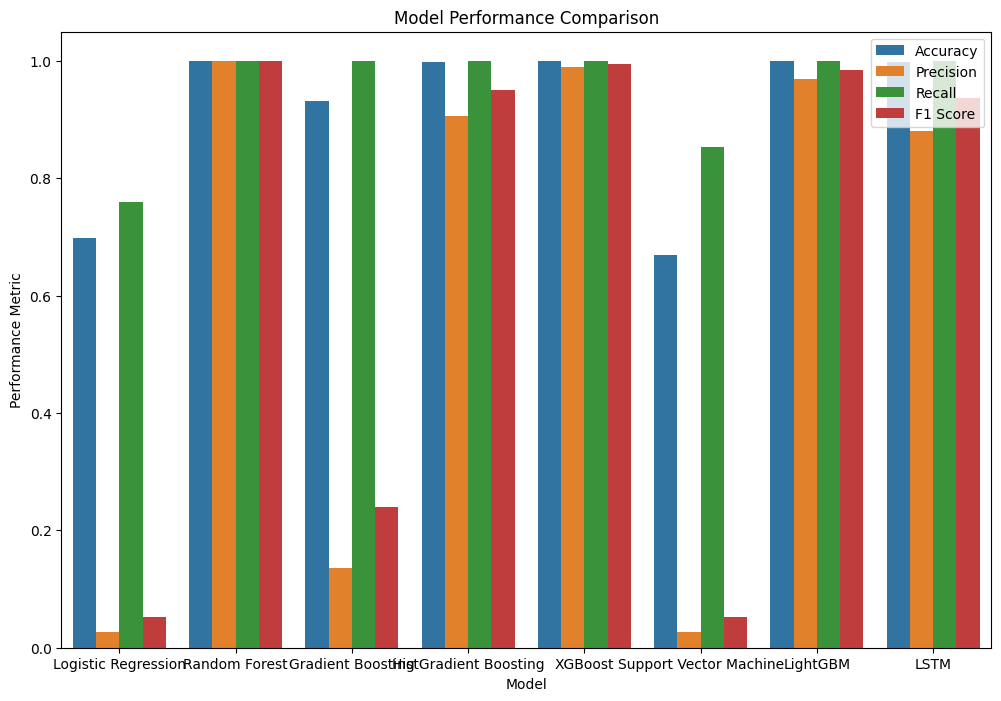

In [49]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator


# Assume 'flood_event' is the target column
X = features
y = target_variable
#dates = data['date']

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(features)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define the models to train
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "HistGradient Boosting": HistGradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Support Vector Machine": SVC(kernel='linear', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),

}

# Train and evaluate the models
model_performance = {}

for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    model_performance[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

    print(f"{name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

# Train LSTM model for time series
# Reshape data for LSTM (assuming time series data format)
X_train_lstm = X_train_resampled.reshape((X_train_resampled.shape[0], 1, X_train_resampled.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the LSTM model
lstm_model.fit(X_train_lstm, y_train_resampled, epochs=10, batch_size=32, verbose=0)

# Evaluate the LSTM model
y_pred_lstm = (lstm_model.predict(X_test_lstm) > 0.5).astype("int32")

accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
precision_lstm = precision_score(y_test, y_pred_lstm)
recall_lstm = recall_score(y_test, y_pred_lstm)
f1_lstm = f1_score(y_test, y_pred_lstm)

model_performance["LSTM"] = {
    'Accuracy': accuracy_lstm,
    'Precision': precision_lstm,
    'Recall': recall_lstm,
    'F1 Score': f1_lstm
}

print(f"LSTM - Accuracy: {accuracy_lstm:.4f}, Precision: {precision_lstm:.4f}, Recall: {recall_lstm:.4f}, F1 Score: {f1_lstm:.4f}")

# Select the model with the highest accuracy
best_model_name = max(model_performance, key=lambda k: model_performance[k]['Accuracy'])
best_model_performance = model_performance[best_model_name]

print(f"\nBest Model: {best_model_name} with Performance: {best_model_performance}")

# Justification
print(f"\n{best_model_name} was selected because it achieved the highest accuracy among the tested models.")

# Visualize the model performance
performance_df = pd.DataFrame(model_performance).T

plt.figure(figsize=(12, 8))
sns.barplot(data=performance_df.reset_index().melt(id_vars=['index']), x='index', y='value', hue='variable')
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Performance Metric')
plt.legend(loc='upper right')
plt.show()